# Breast Cancer Prediction

The challenge is to develop a model to classify Malignant and Benign tissues successfully. 

The flow of the document will be in the following manner:

- Data Exploration and Visualisation
- Data preprocessing/cleaning
- Implementation
- Model Evaluation
- Conclusion

## Data Exploration and Visualisation

### Breast Cancer Dataset

For this project we will use Breast Cancer Dataset available on Kaggle by UCIML.Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.
Data fields
- id - ID number
- diagnosis - The diagnosis of breast tissues (M = malignant, B = benign)
- radius_mean - mean of distances from center to points on the perimeter
- texture_mean - standard deviation of gray-scale values
- perimeter_meanmean size of the core tumor
- area_mean
- smoothness_mean - mean of local variation in radius lengths
- compactness_mean - mean of perimeter^2 / area - 1.0
- concavity_mean - mean of severity of concave portions of the contour
- concave points_mean - mean for number of concave portions of the contour
- symmetry_mean
- fractal_dimension_mean - mean for "coastline approximation" - 1
- radius_se - standard error for the mean of distances from center to points on the perimeter
- texture_se - standard error for standard deviation of gray-scale values
- perimeter_se
- area_se
- smoothness_se - standard error for local variation in radius lengths
- compactness_se - standard error for perimeter^2 / area - 1.0
- concavity_se - standard error for severity of concave portions of the contour
- concave points_se - standard error for number of concave portions of the contour
- symmetry_se
- fractal_dimension_se - standard error for "coastline approximation" - 1
- radius_worst - "worst" or largest mean value for mean of distances from center to points on the perimeter
- texture_worst  "worst" or largest mean value for standard deviation of gray-scale values
- perimeter_worst
- area_worst
- smoothness_worst - "worst" or largest mean value for local variation in radius lengths
- compactness_worst -"worst" or largest mean value for perimeter^2 / area - 1.0
- concavity_worst - "worst" or largest mean value for severity of concave portions of the contour
- concave points_worst- "worst" or largest mean value for number of concave portions of the contour
- symmetry_worst
- fractal_dimension_worst - "worst" or largest mean value for "coastline approximation" - 1

The full dataset can be downloaded from [here](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data).

In [1]:
# import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# input your data path below
df = pd.read_csv('/home/akshit/Downloads/data.csv')

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## Data preprocessing/cleaning
We will remove the null values and remove the id column. we will give the axis to target value.We will Normalize the data

In [4]:
#firstly we drop two columns
df.drop(["id","Unnamed: 32"],axis = 1,inplace = True)
#we change value of diognose M = 0 and B = 1(we use this diversity in logistic regression)
df["diagnosis"].replace("M",0,inplace = True)
df["diagnosis"].replace("B",1,inplace = True)

In [6]:
#we select x,y axis
y = df.diagnosis.values
x_data = df.drop("diagnosis",axis=1)

In [42]:
#Normalize the data using min max Scaler for benchmark model
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
x = mm.fit_transform(x_data)

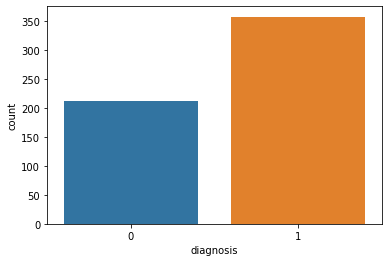

In [84]:
sns.countplot(x = 'diagnosis', data = df)
x = df.iloc[:, 3:]
y = df.diagnosis
y = y.map({'M':0,'B':1})

## Implementation
### Training and Testing Data Split
Before starting the training and the evaluation of the models, we split the dataset into test and training sets. The default split size is 25% which is done below.

In [19]:
#we separate train and test data with sklearn selection model
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y)

### Benchmark Model

In [20]:
from sklearn.linear_model import LogisticRegression
lgr = LogisticRegression(max_iter = 200)
lgr.fit(x_train,y_train)
print("our accuracy is:{}".format(lgr.score(x_test,y_test)))

our accuracy is:0.9370629370629371


In [21]:
#We can evaluate our model so and we have y_predict and y_true(y_test)
from sklearn.metrics import confusion_matrix
y_true = y_test 
y_pred = lgr.predict(x_test) #Predict data for eveluating 
cm = confusion_matrix(y_true,y_pred)

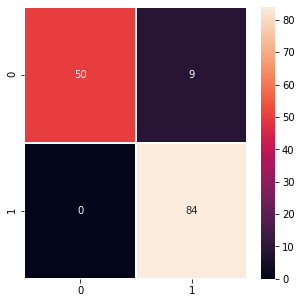

In [22]:
#We draw heatmap for showing confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns
f,ax = plt.subplots(figsize = (5,5))
sns.heatmap(cm,annot = True,linewidth = 1,fmt =".0f",ax = ax)

### Create our Model
We will develop keras Sequential model with 2 hidden layers for classification

The classification process followed the steps:

- Load the data 
- Add input layer and first hidden layer
- Add dropout to prevent overfitting
- Repeat step for 2nd layer and add output layer
- Train the model and calculate the accuracy

In [68]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x_data)

In [27]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

Using TensorFlow backend.
/home/akshit/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/akshit/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/akshit/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/akshit/.local/lib/python3.6/site-packages/tensorflow/python

In [69]:
# Initialising the ANN
classifier = Sequential()
# Adding the input layer and the first hidden layer
classifier.add(Dense(output_dim=16, init='uniform', activation='relu', input_dim=30))
# Adding dropout to prevent overfitting
classifier.add(Dropout(p=0.1))

/home/akshit/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=30, units=16, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
/home/akshit/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.1)`
  


In [70]:
# Adding the second hidden layer
classifier.add(Dense(output_dim=16, init='uniform', activation='relu'))
# Adding dropout to prevent overfitting
classifier.add(Dropout(p=0.1))

/home/akshit/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=16, kernel_initializer="uniform")`
  
/home/akshit/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.1)`
  after removing the cwd from sys.path.


In [71]:
# Adding the output layer
classifier.add(Dense(output_dim=1, init='uniform', activation='sigmoid'))

/home/akshit/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  


In [72]:
# Compiling the ANN
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [85]:
# Fitting the ANN to the Training set
classifier.fit(x_train, y_train, batch_size=100, nb_epoch=150)

Epoch 1/150
426/426 [==============================] - 0s 41us/step - loss: 0.1251 - accuracy: 0.9484
Epoch 2/150
426/426 [==============================] - 0s 30us/step - loss: 0.1286 - accuracy: 0.9437
Epoch 3/150
426/426 [==============================] - 0s 30us/step - loss: 0.1249 - accuracy: 0.9531
Epoch 4/150
426/426 [==============================] - 0s 46us/step - loss: 0.1293 - accuracy: 0.9554
Epoch 5/150
426/426 [==============================] - 0s 50us/step - loss: 0.1264 - accuracy: 0.9554
Epoch 6/150
426/426 [==============================] - 0s 59us/step - loss: 0.1153 - accuracy: 0.9577
Epoch 7/150
426/426 [==============================] - 0s 38us/step - loss: 0.1064 - accuracy: 0.9742
Epoch 8/150
426/426 [==============================] - 0s 54us/step - loss: 0.1209 - accuracy: 0.9554
Epoch 9/150
426/426 [==============================] - 0s 43us/step - loss: 0.1240 - accuracy: 0.9484


/home/akshit/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Epoch 10/150
426/426 [==============================] - 0s 53us/step - loss: 0.1200 - accuracy: 0.9577
Epoch 11/150
426/426 [==============================] - 0s 55us/step - loss: 0.1218 - accuracy: 0.9554
Epoch 12/150
426/426 [==============================] - 0s 37us/step - loss: 0.1034 - accuracy: 0.9671
Epoch 13/150
426/426 [==============================] - 0s 42us/step - loss: 0.1215 - accuracy: 0.9601
Epoch 14/150
426/426 [==============================] - 0s 50us/step - loss: 0.1109 - accuracy: 0.9601
Epoch 15/150
426/426 [==============================] - 0s 46us/step - loss: 0.1075 - accuracy: 0.9648
Epoch 16/150
426/426 [==============================] - 0s 53us/step - loss: 0.1242 - accuracy: 0.9554
Epoch 17/150
426/426 [==============================] - 0s 45us/step - loss: 0.1160 - accuracy: 0.9554
Epoch 18/150
426/426 [==============================] - 0s 49us/step - loss: 0.1042 - accuracy: 0.9554
Epoch 19/150
426/426 [==============================] - 0s 47us/step - lo

426/426 [==============================] - 0s 50us/step - loss: 0.0641 - accuracy: 0.9742
Epoch 90/150
426/426 [==============================] - 0s 45us/step - loss: 0.0739 - accuracy: 0.9765
Epoch 91/150
426/426 [==============================] - 0s 39us/step - loss: 0.0733 - accuracy: 0.9765
Epoch 92/150
426/426 [==============================] - 0s 41us/step - loss: 0.0801 - accuracy: 0.9789
Epoch 93/150
426/426 [==============================] - 0s 32us/step - loss: 0.0655 - accuracy: 0.9812
Epoch 94/150
426/426 [==============================] - 0s 36us/step - loss: 0.0733 - accuracy: 0.9765
Epoch 95/150
426/426 [==============================] - 0s 41us/step - loss: 0.0679 - accuracy: 0.9789
Epoch 96/150
426/426 [==============================] - 0s 33us/step - loss: 0.0754 - accuracy: 0.9789
Epoch 97/150
426/426 [==============================] - 0s 40us/step - loss: 0.0811 - accuracy: 0.9671
Epoch 98/150
426/426 [==============================] - 0s 35us/step - loss: 0.0771 - 

## Model Evaluation
Use the predictor to generate predicted, class labels for the test data. Compare those to the true labels, test_y, and calculate the accuracy as a value between 0 and 1.0 that indicates the fraction of test data that your model classified correctly. We will use sklearn.metrics for this calculation.

In [86]:
# Predicting the Test set results
y_pred = classifier.predict(x_test)
y_pred = (y_pred > 0.5)

In [87]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [92]:
print("Our accuracy is {}%".format(((cm[0][0] + cm[1][1])/139)*100))

Our accuracy is 99.28057553956835%


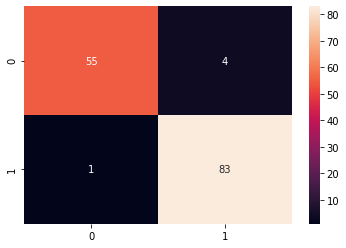

In [93]:
sns.heatmap(cm,annot=True)
plt.savefig('h.png')

### Conclusion
- During the models' implementation a lot of steps were tested and some of them needed to be modified to reach better performance. For choosing a better parameter, we interacted over the options and decided on the one that optimized the accuracy.
- We can say that our model can predict Malignant and benign tissue accurately.
- The benchmark model gave the accuracy of 93.7%, we easily beat the accuracy by 5.5%.